In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

df = pd.read_csv("material_flow.csv")

# Setting max_rows display per print
# pd.options.display.max_rows = 20

# All + continents rows, need only countries
removed = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]

# # Filter only rows where "Flow code" == "DMI"
# df_filtered = df[(df["Flow code"] == "EXP") & (df["Category"] == "Fossil fuels")]

# # Select relevant columns: "Country" and "2022"
# df_filtered = df_filtered[["Country", "2020"]]

# # Convert "2022" column to numeric (in case it's read as a string)
# df_filtered["2022"] = pd.to_numeric(df_filtered["2020"], errors="coerce")

# # Plot the data
# plt.figure(figsize=(20, 6))
# plt.bar(df_filtered["Country"], df_filtered["2020"], color="skyblue")
# plt.xlabel("Country")
# plt.ylabel("Value for 2020")
# plt.title("Flow Code = DMI, Year = 2020 for Each Country")
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()

In [3]:
# Listing unique combinations of Flow Names and Categories


df_distinct = df[["Flow name", "Category"]].drop_duplicates()
df_distinct

,Flow name,Category
0,Domestic Extraction,Biomass
1,Domestic Material Consumption,Biomass
2,Domestic Material Input,Biomass
3,Exports,Biomass
4,Imports,Biomass
...,...,...
66,Domestic Material Consumption,Waste for final treatment and disposal
67,Domestic Material Input,Waste for final treatment and disposal
68,Exports,Waste for final treatment and disposal
69,Imports,Waste for final treatment and disposal


In [22]:
# Domestic Extraction	Fossil fuels (countries that extract petroleum)
# Products from fossil fuel/import (countries that buy gas n stuff)
# Products from biomass   export (countries that export other types of fuel like charcoal, methane, hydrogene

/tmp/ipykernel_128/4132589570.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(labels = df_petroleum_extraction["Country"], rotation=45)


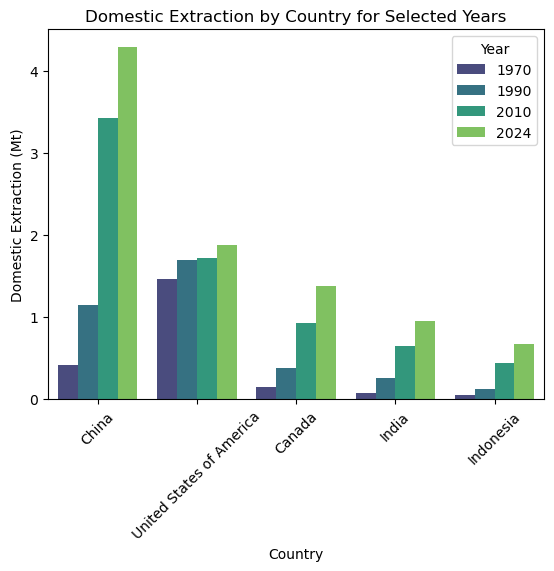

In [47]:
# Chart for the countries that extract petroleum (2024)
YEAR = "2024"
FLOW_NAME = "Domestic Extraction"
CATEGORY = "Fossil fuels"

YEARS = ["1970", "1990", "2010", "2024"]

filter = YEARS
filter.append("Country")

# Filter for this chart only
df_petroleum_extraction = df[(df["Flow name"] == FLOW_NAME) & (df["Category"] == CATEGORY)]
df_petroleum_extraction = df_petroleum_extraction[filter]
df_petroleum_extraction

# # drop NaN rows and 0 value rows
df_petroleum_extraction = df_petroleum_extraction.dropna()
df_petroleum_extraction = df_petroleum_extraction[df_petroleum_extraction[YEAR] > 0]

# # sorting descending
df_petroleum_extraction = df_petroleum_extraction.sort_values(YEAR, ascending=False)

df_petroleum_extraction = df_petroleum_extraction[~df_petroleum_extraction["Country"].isin(removed)]

df_petroleum_extraction = df_petroleum_extraction.head()

melted_data = pd.melt(
    df_petroleum_extraction,
    id_vars=["Country"],
    value_vars=YEARS,
    var_name="Year",
    value_name="Value"
)

plot = sb.barplot(
    data=melted_data,
    x="Country",
    y="Value",
    hue="Year",
    palette="viridis"  # Use any color palette you like
)

plot.set_xticklabels(labels = df_petroleum_extraction["Country"], rotation=45)
plot.yaxis.offsetText.set_visible(False)

plt.xlabel("Country")
plt.ylabel(f"{FLOW_NAME} (Mt)")  # Use the flow unit from the data
plt.title(f"{FLOW_NAME} by Country for Selected Years")
plt.legend(title="Year")

# Show the plot
plt.show()

# plot = sb.barplot(data = df_petroleum_extraction, x = df_petroleum_extraction["Country"], y = df_petroleum_extraction[YEAR])
# plt.ylabel("millions of tons")
# plt.title("Millions of tons of fossil fuels extracted by country, " + YEAR)



# plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=False))